In [3]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import xarray

In [4]:
import pandas as pd

In [5]:
from matplotlib.ticker import FormatStrFormatter

In [6]:
from IPython.display import Image

In [46]:
fs = 17

In [47]:
plt.rc("font",size=fs)

In [9]:
main_path = "/glade/scratch/doubrawa/post_processing/"

In [10]:
height = 100

# open the non-filtered LES

In [11]:
days = [20,21,28,29,30]
hours = np.arange(14,24,1)

In [12]:
minute = 30

In [13]:
# i1=0
# i2=1200

In [14]:
# for day in days:
#     for hour in hours:
#         minutes=np.arange(10,60,10)
#         for minute in minutes:
#             wrfouts = sorted(glob.glob(os.path.join(main_path,'WRF_LES_25m_{0}*2015-03-{1}_{2}:{3:02d}*'.format(height,day,hour,minute))))
#             wrfout  = wrfouts[0]
#             print (os.path.split(wrfout)[-1]) 
#             wrfnc = xarray.open_dataset(wrfout)

#             w = np.squeeze(wrfnc.w)
#             wbox = w.isel(south_north=np.arange(i1,i2,1)).isel(west_east=np.arange(i1,i2,1))

#             datetime = pd.to_datetime(wrfnc.time.values[0])

#             plt.figure(figsize=(10,10))
#             plt.axes(aspect='equal')
#             plt.pcolormesh(wbox,vmin=-1.5,vmax=1.5,cmap='RdBu')#levels=np.arange(-1.2,1.2001,0.1)
#             plt.colorbar()
#             plt.title("{0:%Y-%m-%d %H:%M}".format(datetime))
#             plt.savefig("/glade/u/home/doubrawa/figs/wrf_les_w_100m_{0:%Y-%m-%d_%H-%M}.png".format(datetime))
#             plt.clf()
#             plt.close()
            

# plot

In [32]:
combos = [(21,14,10) , (21,21,30) , (28,23,40)]
# combos = [(21,14,10) , (21,21,30) , (28,23,40)]

In [33]:
zils=[21,586,8]

In [51]:
vmins = [-0.4,-2.4,-2]
vmaxs = [0.4,2.4,2]

WRF_LES_25m_100.0_m_AGL_2015-03-21_14:10.nc
WRF_LES_25m_100.0_m_AGL_2015-03-21_21:30.nc
WRF_LES_25m_100.0_m_AGL_2015-03-28_23:40.nc


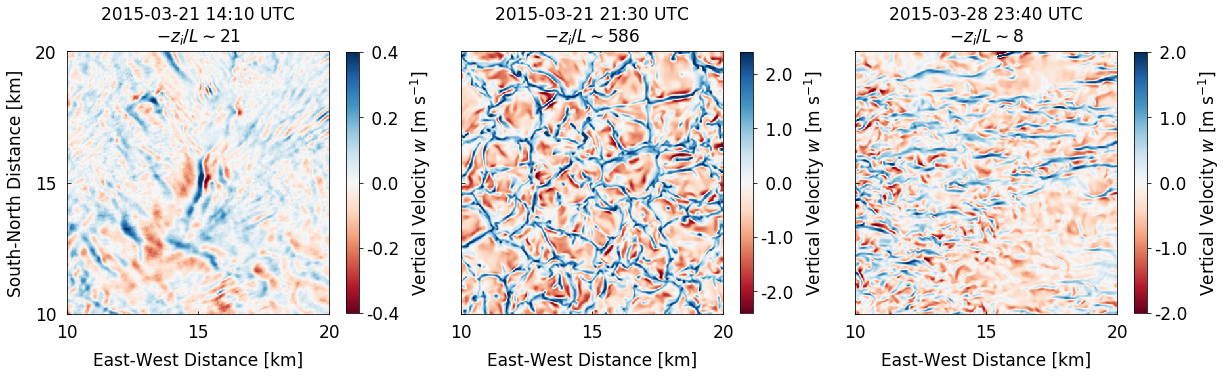

In [62]:
fig = plt.figure(figsize=(20,6))
ax  = {}
iax = 1

i = 0
for combo in combos:
    day,hour,minute = combo

    wrfouts = sorted(glob.glob(os.path.join(main_path,'WRF_LES_25m_{0}*2015-03-{1}_{2}:{3:02d}*'.format(height,day,hour,minute))))
    wrfout  = wrfouts[0]
    print (os.path.split(wrfout)[-1]) 
    wrfnc = xarray.open_dataset(wrfout)

    w        = np.squeeze(wrfnc.w)
    datetime = pd.to_datetime(wrfnc.time.values[0])

    i1 = 400
    i2 = 800

    wbox = w.isel(south_north=np.arange(i1,i2,1)).isel(west_east=np.arange(i1,i2,1))

    desired_ticks = [10,15,20]
    xticks        = [(ii*1000)/25.0 for ii in desired_ticks]
    labels        = ["{0:.0f}".format(dx) for dx in desired_ticks]

    ax[iax]  = fig.add_subplot(1,3,iax,aspect='equal')
    p = ax[iax].pcolormesh(wbox.west_east,wbox.south_north,wbox,vmin=vmins[i],vmax=vmaxs[i],cmap='RdBu')#levels=np.arange(-1.2,1.2001,0.1)

    ax[iax].set_title("{0:%Y-%m-%d %H:%M} UTC\n".format(datetime)+"$-z_i/L\sim${0}".format(zils[i]),fontsize=fs,y=1.01)
    ax[iax].set_xticks(xticks)
    ax[iax].set_xticklabels(labels,fontsize=fs)
    ax[iax].set_yticks(xticks)
    ax[iax].set_yticklabels(labels,fontsize=fs) 
    ax[iax].set_xlabel("East-West Distance [km]",labelpad=10)
    ax[iax].xaxis.set_tick_params(direction='in')
    ax[iax].yaxis.set_tick_params(direction='in')     
    ax[iax].tick_params(axis='both', which='major', pad=10)
    
    clb = plt.colorbar(p,format=FormatStrFormatter('%4.1f'),shrink=0.8)
    clb.set_label('Vertical Velocity '+r'$w$ [m s$^{{-1}}$]', labelpad=10, fontsize=17)

    iax+=1
    i+=1
                      
    
for iax in [2,3]:
    plt.setp(ax[iax].get_yticklabels(), visible=False)
ax[1].set_ylabel("South-North Distance [km]",labelpad=10)

# fig.subplots_adjust(wspace=0.02,right=0.85)
# cbar_ax = fig.add_axes([0.86, 0.15, 0.01, 0.7])
# clb = fig.colorbar(p, cax=cbar_ax, format=FormatStrFormatter('%4.1f'))
# clb.set_label('Vertical Velocity'+'\n'+r'$w$ [m s$^{{-1}}$]', labelpad=10)

fig.savefig("/glade/u/home/doubrawa/figs/example-convective-regimes.png",dpi=500,bbox_inches="tight")

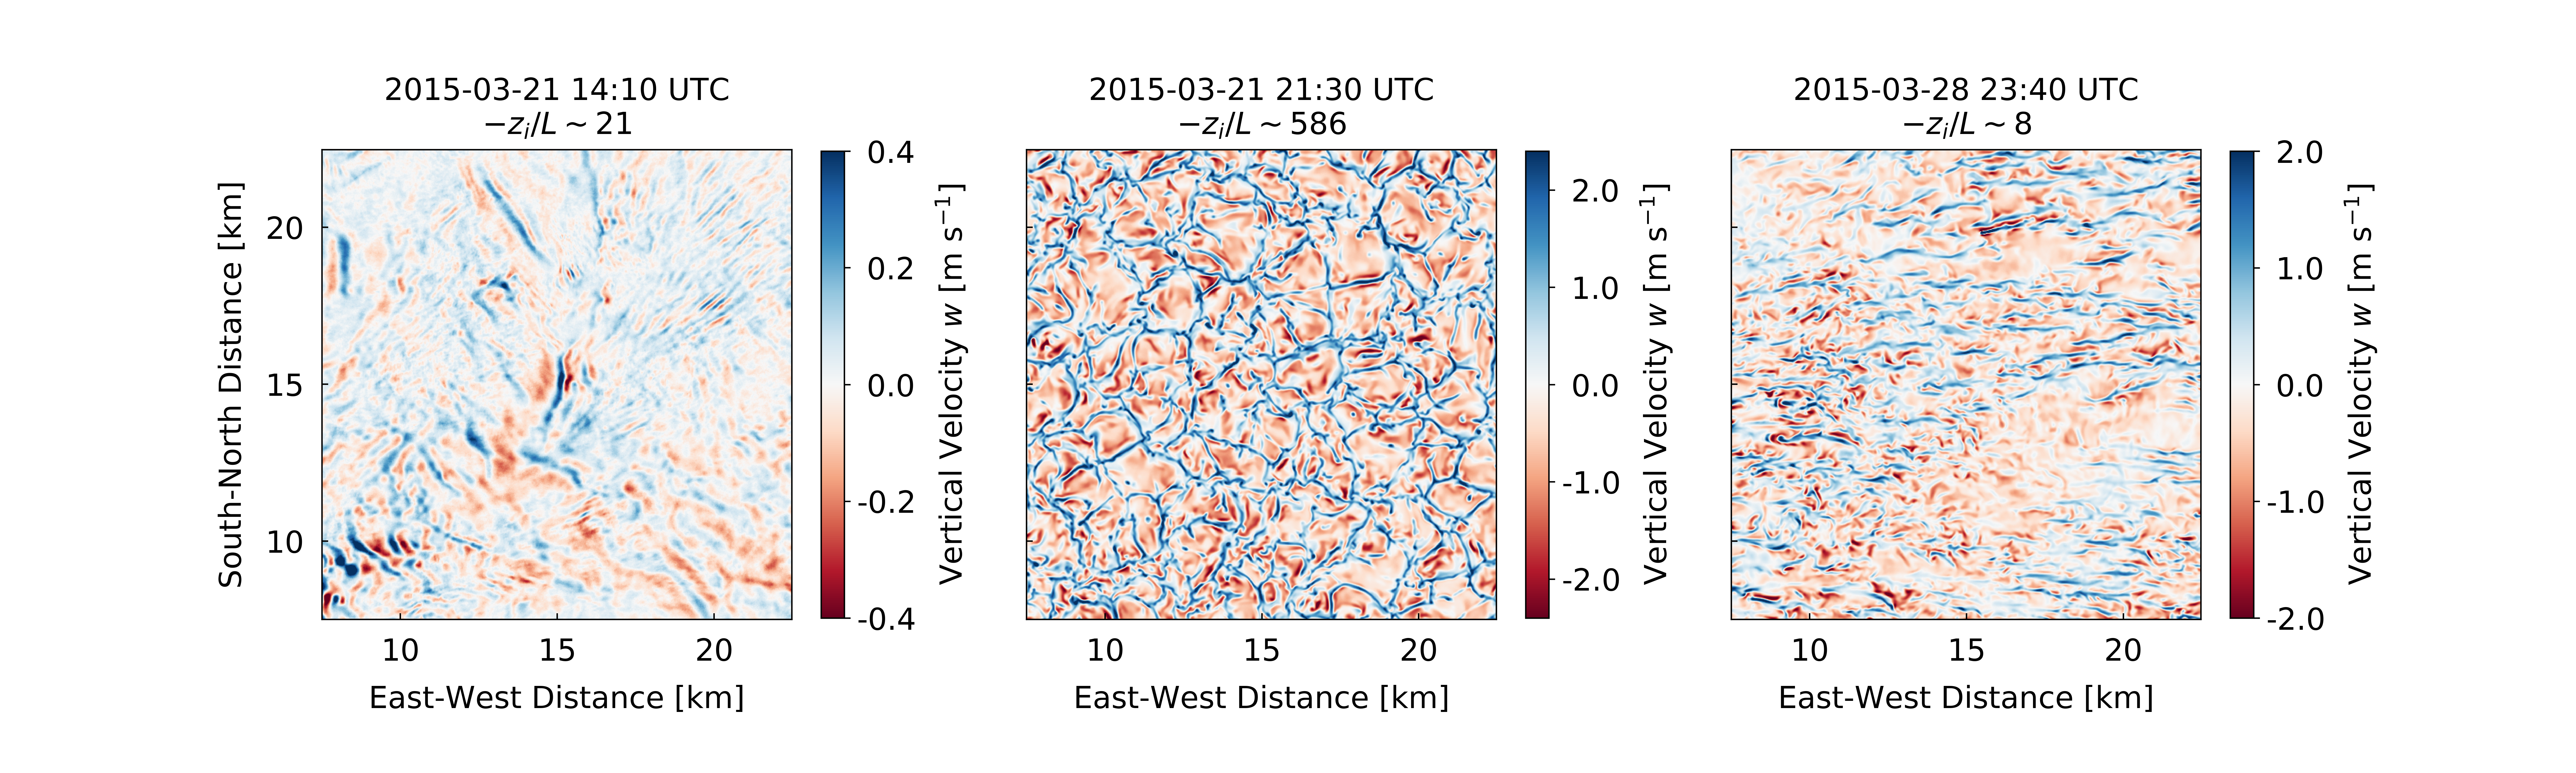

In [59]:
Image("/glade/u/home/doubrawa/figs/example-convective-regimes.png")

In [55]:
# fig = plt.figure(figsize=(7,6))
# ax  = fig.add_subplot(111,aspect='equal')
# p = ax.pcolormesh(wbox.west_east,wbox.south_north,wbox,vmin=-2,vmax=2,cmap='RdBu')#levels=np.arange(-1.2,1.2001,0.1)

# ax.set_title("{0:%Y-%m-%d %H:%M} UTC".format(datetime),fontsize=fs,y=1.01)
# ax.set_xticks(xticks)
# ax.set_xticklabels(labels,fontsize=fs)
# ax.set_yticks(xticks)
# ax.set_yticklabels(labels,fontsize=fs) 
# ax.set_xlabel("East-West Distance [km]")
# ax.set_ylabel("South-North Distance [km]")

# clb = fig.colorbar(p, format=FormatStrFormatter('%3.1f'),shrink=0.9)
# clb.set_label('Vertical Velocity'+'\n'+r'$w$ [m s$^{{-1}}$]', labelpad=10)

# JUNK

In [139]:
day=28
hour=15
minute=10

In [140]:
wrfouts = sorted(glob.glob(os.path.join(main_path,'WRF_LES_25m_{0}*2015-03-{1}_{2}:{3:02d}*'.format(height,day,hour,minute))))
wrfout  = wrfouts[0]
print (os.path.split(wrfout)[-1]) 
wrfnc = xarray.open_dataset(wrfout)

w        = np.squeeze(wrfnc.w)
datetime = pd.to_datetime(wrfnc.time.values[0])

WRF_LES_25m_100.0_m_AGL_2015-03-28_15:10.nc


In [141]:
i1 = 500
i2 = 900

In [142]:
wbox = w.isel(south_north=np.arange(i1,i2,1)).isel(west_east=np.arange(i1,i2,1))

[Text(0, 0, '15'), Text(0, 0, '20')]

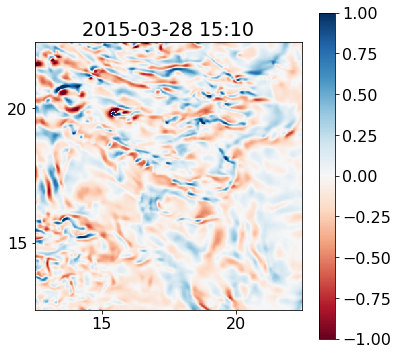

In [144]:
desired_ticks = [15,20]
xticks        = [(ii*1000)/25.0 for ii in desired_ticks]
labels        = ["{0:.0f}".format(dx) for dx in desired_ticks]

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111,aspect='equal')
p = ax.pcolormesh(wbox.west_east,wbox.south_north,wbox,cmap='RdBu',vmin=-1,vmax=1)#levels=np.arange(-1.2,1.2001,0.1)
plt.colorbar(p)
ax.set_title("{0:%Y-%m-%d %H:%M}".format(datetime))
ax.set_xticks(xticks)
ax.set_xticklabels(labels,fontsize=fs)
ax.set_yticks(xticks)
ax.set_yticklabels(labels,fontsize=fs)  